In [1]:
# !usr/bin/python
# -*- encoding: utf-8 -*-
# Project: Visual Geometry Group
# Author: Tracy Tao
# Date: 2022/04/11
import torch 
from torch import nn
from d2l import torch as d2l

In [2]:
def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels, kernel_size = 3, padding =1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size = 2, stride =2))
    return nn.Sequential(*layers)

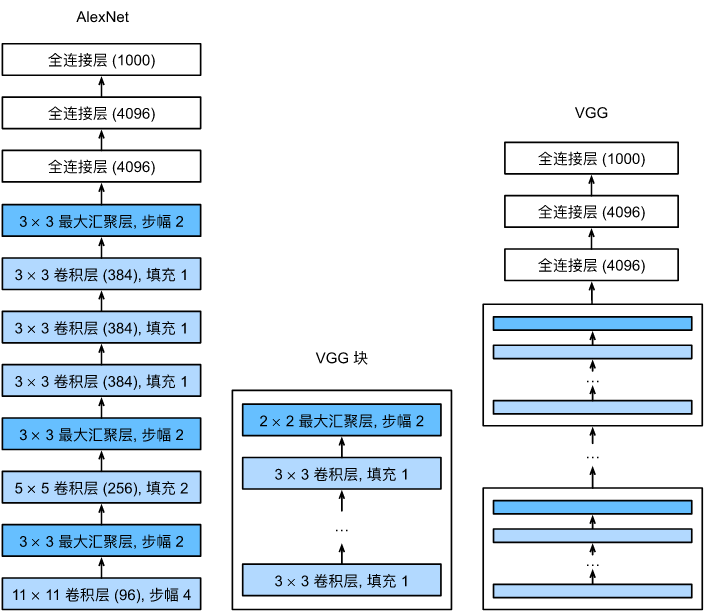

- VGGNet可以看成是加深版的AlexNet，5层卷积层、3层全连接层、softmax层，层与层时间使用max-pooling，激活函数均为ReLU。

In [3]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

In [5]:
def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels
    
    return nn.Sequential(*conv_blks, nn.Flatten(),
                         nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(0.5),
                         nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
                         nn.Linear(4096, 10))
net = vgg(conv_arch)

In [6]:
X = torch.randn(size=(1, 1, 224, 224))
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__,'output shape:\t',X.shape)

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


In [ ]:
class VGG(nn.Module):
    def __init__(self, features, num_classes = 1000, init_weights=True):
        super(VGG,self).__init__()
        self.features = features # 特征提取
        self.avgpool == nn.AdaptiveAvgPool2d((7,7))
        self.classifier = nn.Sequential(nn.Linear(512 *7 *7, 4096)
                                        nn.ReLU(inplace = True),
                                        nn.Dropout(),
                                        nn.Linear(4096, 4096),          # 4096 --> 4096
                                        nn.ReLU(True),
                                        nn.Dropout(),
                                        nn.Linear(4096, num_classes),   # 4096 --> 1000
                                    )
        
         def forward(self, x):
            # 特征提取
            x = self.features(x)
            # 自适应平均池化
            x = self.avgpool(x)
            # 特征图展平成向量
            x = torch.flatten(x, 1)
            # 分类器分类输出
            x = self.classifier(x)
            return x        
        
        def _initialize_weights(self):
            '''
            权重初始化
            '''
            for m in self.modules():
                if isinstance(m, nn.Conv2d):
                    # 卷积层使用 kaimming 初始化
                    nn.init.kaiming_normal_(
                        m.weight, mode='fan_out', nonlinearity='relu')
                    # 偏置初始化为0
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                # 批归一化层权重初始化为1 
                elif isinstance(m, nn.BatchNorm2d):
                    nn.init.constant_(m.weight, 1)
                    nn.init.constant_(m.bias, 0)
                # 全连接层权重初始化
                elif isinstance(m, nn.Linear):
                    nn.init.normal_(m.weight, 0, 0.01)
                    nn.init.constant_(m.bias, 0)
        
        